In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install scikit-learn -q
!pip install pandas -q
!pip install numpy -q
!pip install matplotlib -q

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import keras
from keras import layers
import tensorflow as tf
from sklearn import preprocessing, model_selection
import random

In [4]:
QUALITY_THRESHOLD = 128
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = BATCH_SIZE * 2

In [8]:
eeg = pd.read_csv("/content/drive/MyDrive/GBM462/archive/eeg-data.csv")

In [9]:
eeg.head(10)

,Unnamed: 0,id,indra_time,browser_latency,reading_time,attention_esense,meditation_esense,eeg_power,raw_values,signal_quality,createdAt,updatedAt,label
0,3730,12,2015-05-09 23:13:42.281,1461,2015-05-09 16:13:40.954,0,0,"[944412.0, 111373.0, 52404.0, 28390.0, 3237.0,...","[-203.0, -202.0, -196.0, -185.0, -163.0, -137....",200,2015-05-09 23:13:39.550,2015-05-09 23:13:39.549+00,unlabeled
1,3732,12,2015-05-09 23:13:43.186,1461,2015-05-09 16:13:41.964,0,0,"[1793049.0, 89551.0, 3896.0, 21727.0, 9301.0, ...","[104.0, 134.0, 128.0, 121.0, 145.0, 151.0, 123...",200,2015-05-09 23:13:40.559,2015-05-09 23:13:40.559+00,unlabeled
2,3734,12,2015-05-09 23:13:44.392,1461,2015-05-09 16:13:42.950,0,0,"[400192.0, 640624.0, 153087.0, 69733.0, 98854....","[2002.0, 2047.0, 2047.0, 2047.0, 2047.0, 2047....",200,2015-05-09 23:13:41.549,2015-05-09 23:13:41.549+00,unlabeled
3,3735,12,2015-05-09 23:13:45.297,1461,2015-05-09 16:13:43.935,0,0,"[681192.0, 138630.0, 67891.0, 26459.0, 592240....","[1287.0, 1241.0, 1196.0, 1155.0, 1113.0, 1072....",200,2015-05-09 23:13:42.532,2015-05-09 23:13:42.532+00,unlabeled
4,3737,12,2015-05-09 23:13:46.201,1460,2015-05-09 16:13:44.936,0,0,"[268406.0, 197772.0, 190654.0, 266433.0, 91683...","[1905.0, 1836.0, 1770.0, 1707.0, 1645.0, 1587....",200,2015-05-09 23:13:43.532,2015-05-09 23:13:43.532+00,unlabeled
5,3738,12,2015-05-09 23:13:47.104,1460,2015-05-09 16:13:45.937,0,0,"[314183.0, 120068.0, 138114.0, 53890.0, 335070...","[-859.0, -981.0, -1099.0, -1210.0, -1284.0, -1...",200,2015-05-09 23:13:44.535,2015-05-09 23:13:44.535+00,unlabeled
6,3739,12,2015-05-09 23:13:48.308,1460,2015-05-09 16:13:46.940,0,0,"[102705.0, 103033.0, 53771.0, 51600.0, 31966.0...","[1687.0, 1627.0, 1570.0, 1504.0, 1385.0, 1172....",200,2015-05-09 23:13:45.536,2015-05-09 23:13:45.536+00,unlabeled
7,3741,12,2015-05-09 23:13:49.212,1461,2015-05-09 16:13:47.949,0,0,"[629925.0, 413423.0, 130957.0, 62414.0, 21797....","[2047.0, 2047.0, 2047.0, 2047.0, 2047.0, 2032....",200,2015-05-09 23:13:46.543,2015-05-09 23:13:46.543+00,unlabeled
8,3740,12,2015-05-09 23:13:50.118,1461,2015-05-09 16:13:48.911,0,0,"[536622.0, 273382.0, 68365.0, 173574.0, 142326...","[-965.0, -934.0, -873.0, -765.0, -629.0, -504....",200,2015-05-09 23:13:47.507,2015-05-09 23:13:47.507+00,unlabeled
9,3742,12,2015-05-09 23:13:51.321,1461,2015-05-09 16:13:49.910,0,0,"[1006255.0, 61183.0, 63598.0, 58674.0, 52984.0...","[-2048.0, -2048.0, -2048.0, -2048.0, -2048.0, ...",200,2015-05-09 23:13:48.504,2015-05-09 23:13:48.504+00,unlabeled


In [10]:
eeg.tail(10)

,Unnamed: 0,id,indra_time,browser_latency,reading_time,attention_esense,meditation_esense,eeg_power,raw_values,signal_quality,createdAt,updatedAt,label
30003,10583,17,2015-05-10 00:05:45.364,34,2015-05-09 17:05:46.182,0,0,"[78119.0, 11717.0, 10927.0, 2745.0, 6461.0, 42...","[-27.0, -83.0, -71.0, -33.0, -21.0, -27.0, -29...",200,2015-05-10 00:05:46.207,2015-05-10 00:05:46.207+00,unlabeled
30004,10588,17,2015-05-10 00:05:46.355,34,2015-05-09 17:05:47.167,0,0,"[98355.0, 9793.0, 12486.0, 3186.0, 12351.0, 64...","[58.0, 10.0, -3.0, 20.0, 39.0, 38.0, 36.0, 48....",200,2015-05-10 00:05:47.191,2015-05-10 00:05:47.191+00,unlabeled
30005,10576,17,2015-05-10 00:05:47.700,34,2015-05-09 17:05:48.175,0,0,"[22023.0, 48504.0, 17431.0, 26802.0, 18332.0, ...","[64.0, 33.0, 40.0, 72.0, 100.0, 112.0, 115.0, ...",200,2015-05-10 00:05:48.197,2015-05-10 00:05:48.197+00,unlabeled
30006,10586,17,2015-05-10 00:05:48.354,34,2015-05-09 17:05:49.153,0,0,"[43956.0, 65150.0, 5602.0, 12957.0, 24419.0, 4...","[91.0, 7.0, -4.0, 65.0, 112.0, 96.0, 66.0, 67....",200,2015-05-10 00:05:49.177,2015-05-10 00:05:49.177+00,unlabeled
30007,10581,17,2015-05-10 00:05:49.370,34,2015-05-09 17:05:50.137,0,0,"[97238.0, 56295.0, 8485.0, 3807.0, 6208.0, 322...","[52.0, 20.0, 8.0, 12.0, 18.0, 17.0, 1.0, 3.0, ...",200,2015-05-10 00:05:50.159,2015-05-10 00:05:50.159+00,unlabeled
30008,10584,17,2015-05-10 00:05:50.380,34,2015-05-09 17:05:51.141,0,0,"[477547.0, 152641.0, 5145.0, 9858.0, 39852.0, ...","[57.0, 12.0, 9.0, 33.0, 50.0, 66.0, 64.0, 52.0...",200,2015-05-10 00:05:51.162,2015-05-10 00:05:51.162+00,unlabeled
30009,10589,17,2015-05-10 00:05:51.389,34,2015-05-09 17:05:52.134,0,0,"[388959.0, 48072.0, 11231.0, 14509.0, 25687.0,...","[21.0, -56.0, -37.0, 25.0, 56.0, 49.0, 23.0, 5...",200,2015-05-10 00:05:52.161,2015-05-10 00:05:52.161+00,unlabeled
30010,10590,17,2015-05-10 00:05:52.366,34,2015-05-09 17:05:53.120,0,0,"[53357.0, 18929.0, 11169.0, 11818.0, 20640.0, ...","[42.0, -4.0, -19.0, 19.0, 53.0, 44.0, 16.0, 4....",200,2015-05-10 00:05:53.144,2015-05-10 00:05:53.144+00,unlabeled
30011,10587,17,2015-05-10 00:05:53.382,34,2015-05-09 17:05:54.142,0,0,"[40891.0, 108300.0, 19622.0, 14285.0, 11863.0,...","[4.0, -24.0, -19.0, 24.0, 55.0, 65.0, 67.0, 58...",200,2015-05-10 00:05:54.167,2015-05-10 00:05:54.167+00,unlabeled
30012,10591,17,2015-05-10 00:05:54.645,34,2015-05-09 17:05:55.140,0,0,"[61861.0, 11302.0, 8251.0, 8788.0, 42668.0, 88...","[-35.0, -81.0, -62.0, 7.0, 80.0, 105.0, 97.0, ...",200,2015-05-10 00:05:55.165,2015-05-10 00:05:55.165+00,unlabeled


In [11]:
unlabeled_eeg = eeg[eeg["label"] == "unlabeled"]
eeg = eeg.loc[eeg["label"] != "unlabeled"]
eeg = eeg.loc[eeg["label"] != "everyone paired"]

eeg.drop(
    [
        "indra_time",
        "Unnamed: 0",
        "browser_latency",
        "reading_time",
        "attention_esense",
        "meditation_esense",
        "updatedAt",
        "createdAt",
    ],
    axis=1,
    inplace=True,
)

eeg.reset_index(drop=True, inplace=True)

In [12]:
eeg.head(5)

,id,eeg_power,raw_values,signal_quality,label
0,7,"[56887.0, 45471.0, 20074.0, 5359.0, 22594.0, 7...","[99.0, 96.0, 91.0, 89.0, 91.0, 89.0, 87.0, 93....",0,blinkInstruction
1,5,"[11626.0, 60301.0, 5805.0, 15729.0, 4448.0, 33...","[23.0, 40.0, 64.0, 89.0, 86.0, 33.0, -14.0, -1...",0,blinkInstruction
2,1,"[15777.0, 33461.0, 21385.0, 44193.0, 11741.0, ...","[41.0, 26.0, 16.0, 20.0, 34.0, 51.0, 56.0, 55....",0,blinkInstruction
3,13,"[311822.0, 44739.0, 19000.0, 19100.0, 2650.0, ...","[208.0, 198.0, 122.0, 84.0, 161.0, 249.0, 216....",0,blinkInstruction
4,4,"[687393.0, 10289.0, 2942.0, 9874.0, 1059.0, 29...","[129.0, 133.0, 114.0, 105.0, 101.0, 109.0, 99....",0,blinkInstruction


In [13]:
eeg.tail(5)

,id,eeg_power,raw_values,signal_quality,label
9954,30,"[35875.0, 46511.0, 13748.0, 6682.0, 15162.0, 1...","[39.0, 9.0, 0.0, -5.0, 1.0, 22.0, 33.0, 34.0, ...",0,colorRound5-6
9955,16,"[91328.0, 9998.0, 6363.0, 5008.0, 3499.0, 1794...","[17.0, 33.0, 43.0, 38.0, 18.0, 10.0, 34.0, 59....",0,colorRound5-6
9956,22,"[606090.0, 199510.0, 23199.0, 71045.0, 21531.0...","[-238.0, -37.0, 220.0, 346.0, 293.0, 149.0, 51...",0,colorRound5-6
9957,25,"[10981.0, 19262.0, 18455.0, 8914.0, 8376.0, 79...","[96.0, 72.0, 39.0, 29.0, 66.0, 100.0, 88.0, 66...",0,colorRound5-6
9958,26,"[119302.0, 36061.0, 22378.0, 10438.0, 10659.0,...","[52.0, 76.0, 72.0, 55.0, 68.0, 75.0, 82.0, 93....",0,colorRound5-6


In [14]:
def convert_string_data_to_values(value_string):
    str_list = json.loads(value_string)
    return str_list


eeg["raw_values"] = eeg["raw_values"].apply(convert_string_data_to_values)

eeg = eeg.loc[eeg["signal_quality"] < QUALITY_THRESHOLD]

In [15]:
eeg.head(10)

,id,eeg_power,raw_values,signal_quality,label
0,7,"[56887.0, 45471.0, 20074.0, 5359.0, 22594.0, 7...","[99.0, 96.0, 91.0, 89.0, 91.0, 89.0, 87.0, 93....",0,blinkInstruction
1,5,"[11626.0, 60301.0, 5805.0, 15729.0, 4448.0, 33...","[23.0, 40.0, 64.0, 89.0, 86.0, 33.0, -14.0, -1...",0,blinkInstruction
2,1,"[15777.0, 33461.0, 21385.0, 44193.0, 11741.0, ...","[41.0, 26.0, 16.0, 20.0, 34.0, 51.0, 56.0, 55....",0,blinkInstruction
3,13,"[311822.0, 44739.0, 19000.0, 19100.0, 2650.0, ...","[208.0, 198.0, 122.0, 84.0, 161.0, 249.0, 216....",0,blinkInstruction
4,4,"[687393.0, 10289.0, 2942.0, 9874.0, 1059.0, 29...","[129.0, 133.0, 114.0, 105.0, 101.0, 109.0, 99....",0,blinkInstruction
5,14,"[24981.0, 16011.0, 14499.0, 14093.0, 13691.0, ...","[-11.0, 33.0, 86.0, 132.0, 147.0, 123.0, 105.0...",0,blinkInstruction
6,6,"[797109.0, 181902.0, 14391.0, 25800.0, 46876.0...","[104.0, 109.0, 104.0, 115.0, 107.0, 66.0, 50.0...",0,blinkInstruction
7,8,"[25030.0, 127268.0, 7532.0, 10676.0, 35708.0, ...","[72.0, 64.0, 27.0, 3.0, 25.0, 57.0, 66.0, 52.0...",0,blinkInstruction
8,7,"[1520707.0, 115349.0, 6386.0, 24429.0, 10172.0...","[125.0, 115.0, 101.0, 100.0, 121.0, 140.0, 146...",0,blinkInstruction
9,12,"[45008.0, 22051.0, 25761.0, 10736.0, 6656.0, 8...","[-30.0, -58.0, -30.0, 7.0, 23.0, 11.0, -6.0, 0...",0,blinkInstruction


In [16]:
eeg.tail(10)

,id,eeg_power,raw_values,signal_quality,label
9949,29,"[12075.0, 93373.0, 44986.0, 42426.0, 11489.0, ...","[97.0, 97.0, 100.0, 107.0, 107.0, 85.0, 60.0, ...",0,colorRound5-6
9950,29,"[12075.0, 93373.0, 44986.0, 42426.0, 11489.0, ...","[97.0, 97.0, 100.0, 107.0, 107.0, 85.0, 60.0, ...",0,colorRound5-6
9951,17,"[5567.0, 27122.0, 41405.0, 40848.0, 9634.0, 62...","[34.0, 26.0, 18.0, 10.0, 6.0, 1.0, -24.0, -30....",0,colorRound5-6
9952,18,"[30901.0, 28059.0, 6189.0, 9396.0, 5305.0, 154...","[152.0, 129.0, 112.0, 96.0, 82.0, 88.0, 114.0,...",0,colorRound5-6
9953,23,"[181606.0, 101354.0, 54574.0, 36474.0, 19794.0...","[45.0, 51.0, 49.0, 40.0, 22.0, 10.0, 17.0, 19....",0,colorRound5-6
9954,30,"[35875.0, 46511.0, 13748.0, 6682.0, 15162.0, 1...","[39.0, 9.0, 0.0, -5.0, 1.0, 22.0, 33.0, 34.0, ...",0,colorRound5-6
9955,16,"[91328.0, 9998.0, 6363.0, 5008.0, 3499.0, 1794...","[17.0, 33.0, 43.0, 38.0, 18.0, 10.0, 34.0, 59....",0,colorRound5-6
9956,22,"[606090.0, 199510.0, 23199.0, 71045.0, 21531.0...","[-238.0, -37.0, 220.0, 346.0, 293.0, 149.0, 51...",0,colorRound5-6
9957,25,"[10981.0, 19262.0, 18455.0, 8914.0, 8376.0, 79...","[96.0, 72.0, 39.0, 29.0, 66.0, 100.0, 88.0, 66...",0,colorRound5-6
9958,26,"[119302.0, 36061.0, 22378.0, 10438.0, 10659.0,...","[52.0, 76.0, 72.0, 55.0, 68.0, 75.0, 82.0, 93....",0,colorRound5-6


In [17]:
eeg.shape[0]

9954

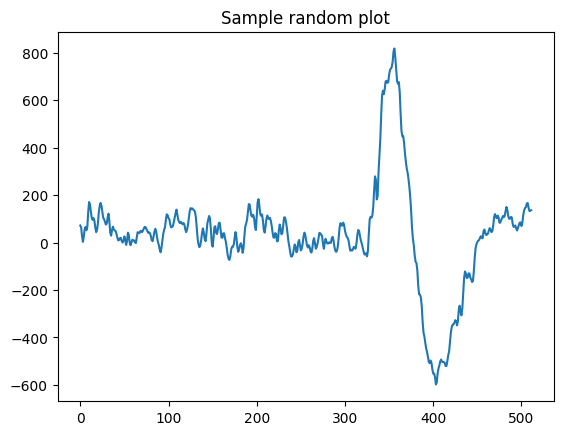

In [18]:
def view_eeg_plot(idx):
    data = eeg.loc[idx, "raw_values"]
    plt.plot(data)
    plt.title(f"Sample random plot")
    plt.show()


view_eeg_plot(7)

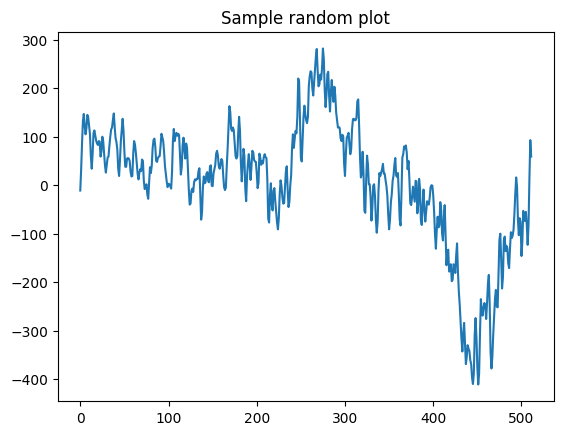

In [19]:
view_eeg_plot(5)

In [20]:
print("Before replacing labels")
print(eeg["label"].unique(), "\n")
print(len(eeg["label"].unique()), "\n")


eeg.replace(
    {
        "label": {
            "blink1": "blink",
            "blink2": "blink",
            "blink3": "blink",
            "blink4": "blink",
            "blink5": "blink",
            "math1": "math",
            "math2": "math",
            "math3": "math",
            "math4": "math",
            "math5": "math",
            "math6": "math",
            "math7": "math",
            "math8": "math",
            "math9": "math",
            "math10": "math",
            "math11": "math",
            "math12": "math",
            "thinkOfItems-ver1": "thinkOfItems",
            "thinkOfItems-ver2": "thinkOfItems",
            "video-ver1": "video",
            "video-ver2": "video",
            "thinkOfItemsInstruction-ver1": "thinkOfItemsInstruction",
            "thinkOfItemsInstruction-ver2": "thinkOfItemsInstruction",
            "colorRound1-1": "colorRound1",
            "colorRound1-2": "colorRound1",
            "colorRound1-3": "colorRound1",
            "colorRound1-4": "colorRound1",
            "colorRound1-5": "colorRound1",
            "colorRound1-6": "colorRound1",
            "colorRound2-1": "colorRound2",
            "colorRound2-2": "colorRound2",
            "colorRound2-3": "colorRound2",
            "colorRound2-4": "colorRound2",
            "colorRound2-5": "colorRound2",
            "colorRound2-6": "colorRound2",
            "colorRound3-1": "colorRound3",
            "colorRound3-2": "colorRound3",
            "colorRound3-3": "colorRound3",
            "colorRound3-4": "colorRound3",
            "colorRound3-5": "colorRound3",
            "colorRound3-6": "colorRound3",
            "colorRound4-1": "colorRound4",
            "colorRound4-2": "colorRound4",
            "colorRound4-3": "colorRound4",
            "colorRound4-4": "colorRound4",
            "colorRound4-5": "colorRound4",
            "colorRound4-6": "colorRound4",
            "colorRound5-1": "colorRound5",
            "colorRound5-2": "colorRound5",
            "colorRound5-3": "colorRound5",
            "colorRound5-4": "colorRound5",
            "colorRound5-5": "colorRound5",
            "colorRound5-6": "colorRound5",
            "colorInstruction1": "colorInstruction",
            "colorInstruction2": "colorInstruction",
            "readyRound1": "readyRound",
            "readyRound2": "readyRound",
            "readyRound3": "readyRound",
            "readyRound4": "readyRound",
            "readyRound5": "readyRound",
            "colorRound1": "colorRound",
            "colorRound2": "colorRound",
            "colorRound3": "colorRound",
            "colorRound4": "colorRound",
            "colorRound5": "colorRound",
        }
    },
    inplace=True,
)

print("After replacing labels")
print(eeg["label"].unique())
print(len(eeg["label"].unique()))

le = preprocessing.LabelEncoder()  # Generates a look-up table
le.fit(eeg["label"])
eeg["label"] = le.transform(eeg["label"])

Before replacing labels
['blinkInstruction' 'blink1' 'blink2' 'blink3' 'blink4' 'blink5'
 'relaxInstruction' 'relax' 'mathInstruction' 'math1' 'math2' 'math3'
 'math4' 'math5' 'math6' 'math7' 'math8' 'math9' 'math10' 'math11'
 'math12' 'musicInstruction' 'music' 'videoInstruction' 'video-ver1'
 'thinkOfItemsInstruction-ver1' 'thinkOfItems-ver1' 'colorInstruction1'
 'colorInstruction2' 'readyRound1' 'colorRound1-1' 'colorRound1-2'
 'colorRound1-3' 'colorRound1-4' 'colorRound1-5' 'colorRound1-6'
 'readyRound2' 'colorRound2-1' 'colorRound2-2' 'colorRound2-3'
 'colorRound2-4' 'colorRound2-5' 'colorRound2-6' 'readyRound3'
 'colorRound3-1' 'colorRound3-2' 'colorRound3-3' 'colorRound3-4'
 'colorRound3-5' 'colorRound3-6' 'readyRound4' 'colorRound4-1'
 'colorRound4-2' 'colorRound4-3' 'colorRound4-4' 'colorRound4-5'
 'colorRound4-6' 'readyRound5' 'colorRound5-1' 'colorRound5-2'
 'colorRound5-3' 'colorRound5-4' 'colorRound5-5' 'colorRound5-6'
 'video-ver2' 'thinkOfItemsInstruction-ver2' 'thinkOfI

In [21]:
num_classes = len(eeg["label"].unique())
print(num_classes)

19


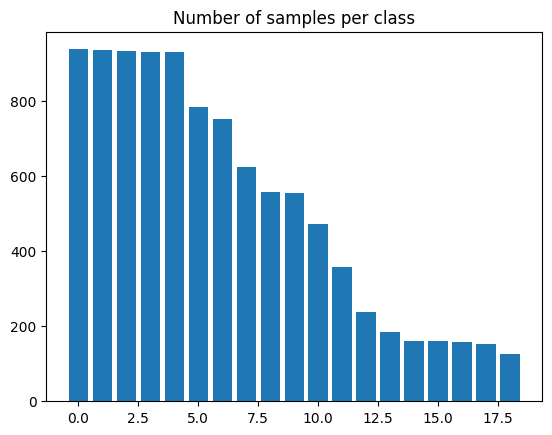

In [22]:
plt.bar(range(num_classes), eeg["label"].value_counts())
plt.title("Number of samples per class")
plt.show()

In [23]:
scaler = preprocessing.MinMaxScaler()
series_list = [
    scaler.fit_transform(np.asarray(i).reshape(-1, 1)) for i in eeg["raw_values"]
]

labels_list = [i for i in eeg["label"]]

In [24]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    series_list, labels_list, test_size=0.15, random_state=42, shuffle=True
)

print(
    f"Length of x_train : {len(x_train)}\nLength of x_test : {len(x_test)}\nLength of y_train : {len(y_train)}\nLength of y_test : {len(y_test)}"
)

x_train = np.asarray(x_train).astype(np.float32).reshape(-1, 512, 1)
y_train = np.asarray(y_train).astype(np.float32).reshape(-1, 1)
y_train = keras.utils.to_categorical(y_train)

x_test = np.asarray(x_test).astype(np.float32).reshape(-1, 512, 1)
y_test = np.asarray(y_test).astype(np.float32).reshape(-1, 1)
y_test = keras.utils.to_categorical(y_test)

Length of x_train : 8460
Length of x_test : 1494
Length of y_train : 8460
Length of y_test : 1494


In [25]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [26]:
vals_dict = {}
for i in eeg["label"]:
    if i in vals_dict.keys():
        vals_dict[i] += 1
    else:
        vals_dict[i] = 1
total = sum(vals_dict.values())

# Formula used - Naive method where
# weight = 1 - (no. of samples present / total no. of samples)
# So more the samples, lower the weight

weight_dict = {k: (1 - (v / total)) for k, v in vals_dict.items()}
print(weight_dict)

{1: 0.9872413100261201, 0: 0.975989551938919, 14: 0.9841269841269842, 13: 0.9061683745228049, 9: 0.9838255977496484, 8: 0.9059674502712477, 11: 0.9847297568816556, 10: 0.9063692987743621, 18: 0.9838255977496484, 17: 0.9057665260196905, 16: 0.9373116335141651, 15: 0.9065702230259193, 2: 0.9211372312638135, 12: 0.9525818766325096, 3: 0.9245529435402853, 4: 0.943841671689773, 5: 0.9641350210970464, 6: 0.981514968856741, 7: 0.9443439823186659}


In [27]:
def plot_history_metrics(history: keras.callbacks.History):
    total_plots = len(history.history)
    cols = total_plots // 2

    rows = total_plots // cols

    if total_plots % cols != 0:
        rows += 1

    pos = range(1, total_plots + 1)
    plt.figure(figsize=(15, 10))
    for i, (key, value) in enumerate(history.history.items()):
        plt.subplot(rows, cols, pos[i])
        plt.plot(range(len(value)), value)
        plt.title(str(key))
    plt.show()

In [74]:
def create_model():
    input_layer = keras.Input(shape=(512, 1))

    x = layers.Conv1D(filters=32, kernel_size=3, strides=2, activation="relu", padding="same")(input_layer)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(filters=64, kernel_size=3, strides=2, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(filters=64, kernel_size=3, strides=2, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(filters=128, kernel_size=5, strides=2, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(filters=128, kernel_size=5, strides=2, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(filters=256, kernel_size=5, strides=2, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(filters=256, kernel_size=5, strides=2, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(filters=512, kernel_size=7, strides=2, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(filters=512, kernel_size=7, strides=2, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(filters=1024,kernel_size=7,strides=2,activation="relu",padding="same",)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(filters=1024,kernel_size=7,strides=2,activation="relu",padding="same",)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Dropout(0.2)(x)

    x = layers.Flatten()(x)

    x = layers.Dense(8192, activation="relu")(x)
    x = layers.Dropout(0.1)(x)

    x = layers.Dense(4096, activation="relu")(x)
    x = layers.Dropout(0.1)(x)

    x = layers.Dense(2048, activation="relu", kernel_regularizer=keras.regularizers.L2())(x)
    x = layers.Dropout(0.1)(x)

    x = layers.Dense(1024, activation="relu", kernel_regularizer=keras.regularizers.L2())(x)
    x = layers.Dropout(0.1)(x)

    x = layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.L2())(x)

    output_layer = layers.Dense(num_classes, activation="softmax")(x)

    return keras.Model(inputs=input_layer, outputs=output_layer)

In [145]:
def create_model():
    input_layer = keras.Input(shape=(512, 1))

    x = layers.Conv1D(filters=32, kernel_size=3, strides=2, activation="relu", padding="same")(input_layer)
    x = layers.BatchNormalization()(x)
    # x = layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    x = layers.Conv1D(filters=64, kernel_size=3, strides=2, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)
    # x = layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    x = layers.Conv1D(filters=64, kernel_size=3, strides=2, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)
    # x = layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    x = layers.Conv1D(filters=128, kernel_size=3, strides=2, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)
    # x = layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # x = layers.Conv1D(filters=128, kernel_size=3, strides=2, activation="relu", padding="same")(x)
    # x = layers.BatchNormalization()(x)
    # x = layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    x = layers.Conv1D(filters=256, kernel_size=3, strides=2, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)
    # x = layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # x = layers.Conv1D(filters=256, kernel_size=3, strides=2, activation="relu", padding="same")(x)
    # x = layers.BatchNormalization()(x)
    # x = layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    x = layers.Conv1D(filters=512, kernel_size=5, strides=2, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)
    # x = layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # x = layers.Conv1D(filters=512, kernel_size=5, strides=2, activation="relu", padding="same")(x)
    # x = layers.BatchNormalization()(x)
    # x = layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    x = layers.Conv1D(filters=1024, kernel_size=5, strides=2, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)
    # x = layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    x = layers.Conv1D(filters=1024, kernel_size=5, strides=2, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)
    # x = layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    x = layers.Dropout(0.1)(x)

    x = layers.Flatten()(x)

    # x = layers.Dense(8192, activation="relu")(x)
    # x = layers.Dropout(0.1)(x)

    x = layers.Dense(4096, activation="relu")(x)
    x = layers.Dropout(0.1)(x)

    x = layers.Dense(2048, activation="relu", kernel_regularizer=keras.regularizers.L2())(x)
    x = layers.Dropout(0.1)(x)

    x = layers.Dense(1024, activation="relu", kernel_regularizer=keras.regularizers.L2())(x)
    x = layers.Dropout(0.1)(x)

    x = layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.L2())(x)
    x = layers.Dropout(0.1)(x)

    # x = layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.L2())(x)
    # x = layers.Dropout(0.1)(x)

    x = layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.L2())(x)
    # x = layers.Dropout(0.1)(x)

    # x = layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.L2())(x)

    output_layer = layers.Dense(num_classes, activation="softmax")(x)

    return keras.Model(inputs=input_layer, outputs=output_layer)

In [146]:
tf.keras.backend.clear_session()
conv_model = create_model()
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 256, 32)           128       
                                                                 
 batch_normalization (Batch  (None, 256, 32)           128       
 Normalization)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 128, 64)           6208      
                                                                 
 batch_normalization_1 (Bat  (None, 128, 64)           256       
 chNormalization)                                                
                                                                 
 conv1d_2 (Conv1D)           (None, 64, 64)            12352 

In [147]:
epochs = 30

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_top_k_categorical_accuracy",
        factor=0.2,
        patience=2,
        min_lr=0.000001,
    ),
]

optimizer = keras.optimizers.Adam(amsgrad=True, learning_rate=0.001)
loss = keras.losses.CategoricalCrossentropy()

In [148]:
conv_model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=[
        keras.metrics.TopKCategoricalAccuracy(k=3),
        keras.metrics.AUC(),
        keras.metrics.Precision(),
        keras.metrics.Recall(),
    ],
)

conv_model_history = conv_model.fit(
    train_dataset,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=test_dataset,
    class_weight=weight_dict,
)

Epoch 1/30
133/133 [==============================] - 23s 102ms/step - loss: 11.0469 - top_k_categorical_accuracy: 0.2970 - auc: 0.6771 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 3.6060 - val_top_k_categorical_accuracy: 0.2483 - val_auc: 0.6414 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 2/30
133/133 [==============================] - 8s 61ms/step - loss: 2.9225 - top_k_categorical_accuracy: 0.3204 - auc: 0.7029 - precision: 0.2000 - recall: 1.1820e-04 - val_loss: 3.0410 - val_top_k_categorical_accuracy: 0.2470 - val_auc: 0.6330 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 3/30
133/133 [==============================] - 8s 61ms/step - loss: 2.6288 - top_k_categorical_accuracy: 0.3342 - auc: 0.7161 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.9386 - val_top_k_categorical_accuracy: 0.2497 - val_auc: 0.6377 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 4/30
133/133 [===============

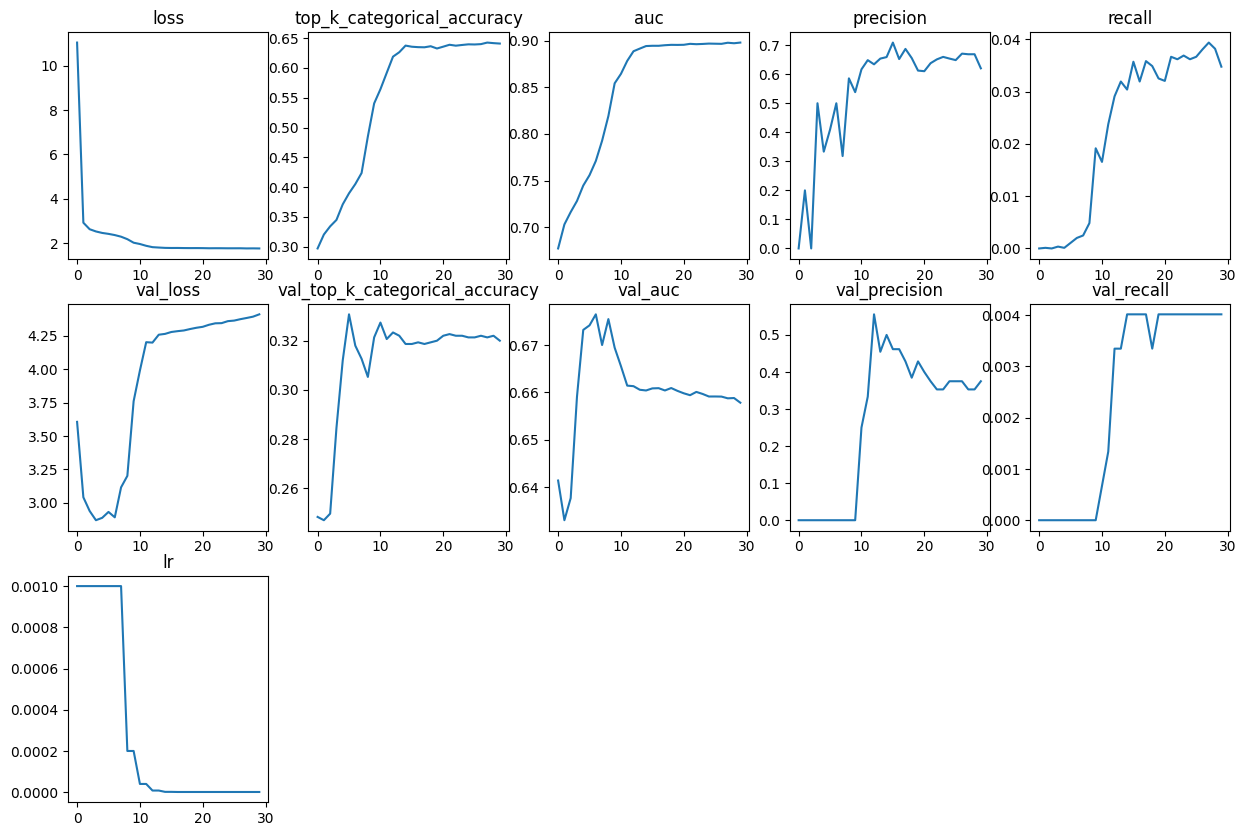

In [149]:
plot_history_metrics(conv_model_history)

24/24 [==============================] - 0s 10ms/step - loss: 4.4113 - top_k_categorical_accuracy: 0.3199 - auc: 0.6578 - precision: 0.3750 - recall: 0.0040
Loss : 4.4113264083862305
Top 3 Categorical Accuracy : 0.31994643807411194
Area under the Curve (ROC) : 0.6578443050384521
Precision : 0.375
Recall : 0.00401606410741806


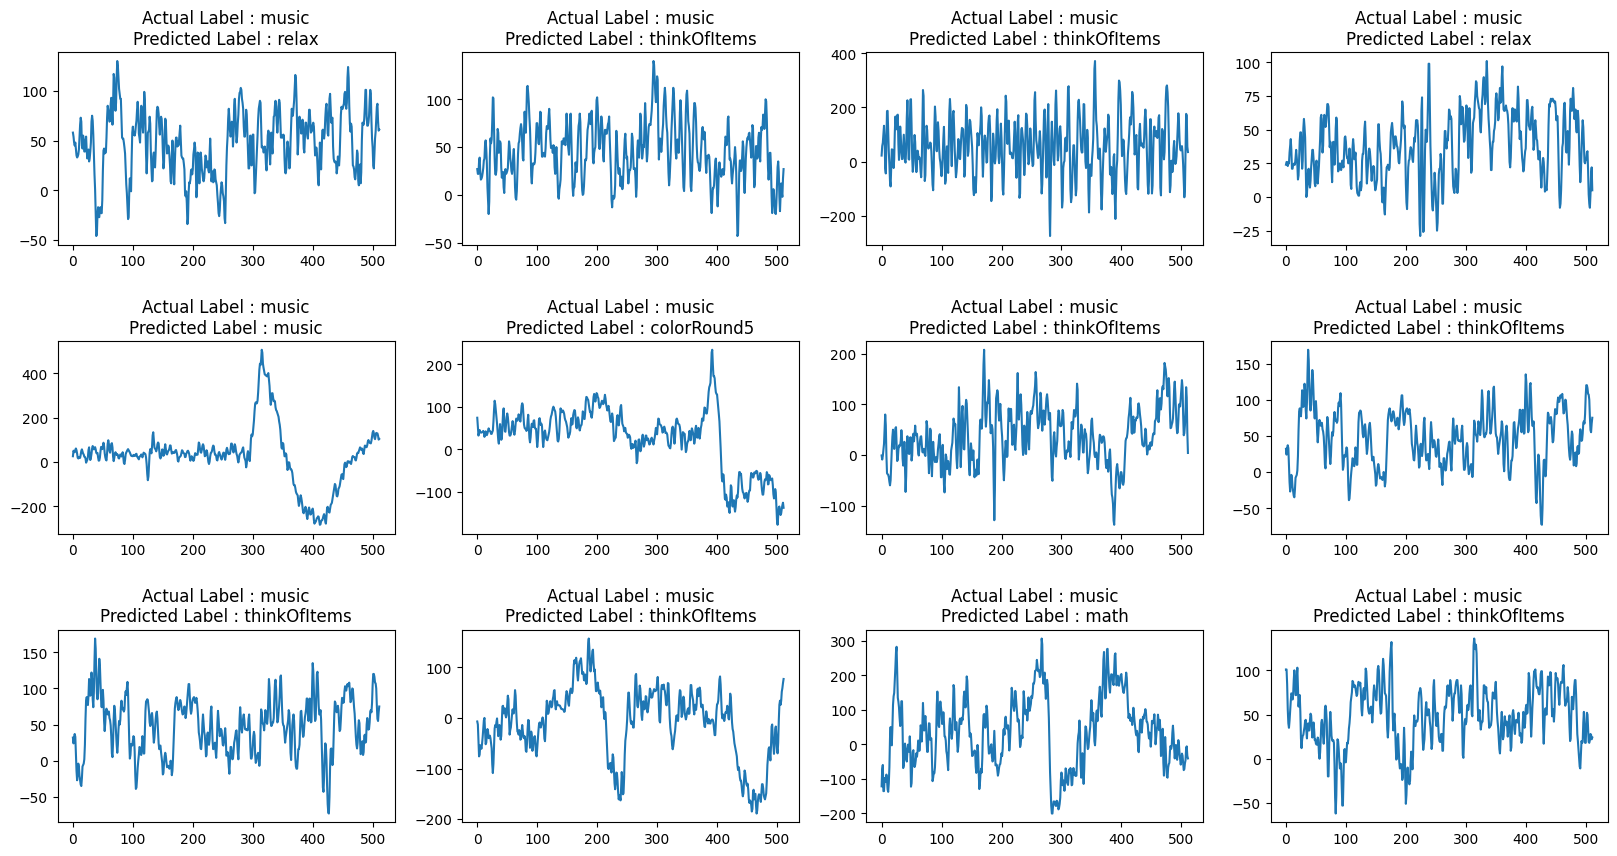

In [151]:
loss, accuracy, auc, precision, recall = conv_model.evaluate(test_dataset)
print(f"Loss : {loss}")
print(f"Top 3 Categorical Accuracy : {accuracy}")
print(f"Area under the Curve (ROC) : {auc}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")


def view_evaluated_eeg_plots(model):
    start_index = random.randint(10, len(eeg))
    end_index = start_index + 11
    data = eeg.loc[start_index:end_index, "raw_values"]
    data_array = [scaler.fit_transform(np.asarray(i).reshape(-1, 1)) for i in data]
    data_array = [np.asarray(data_array).astype(np.float32).reshape(-1, 512, 1)]
    original_labels = eeg.loc[start_index:end_index, "label"]
    predicted_labels = np.argmax(model.predict(data_array, verbose=0), axis=1)
    original_labels = [
        le.inverse_transform(np.array(label).reshape(-1))[0]
        for label in original_labels
    ]
    predicted_labels = [
        le.inverse_transform(np.array(label).reshape(-1))[0]
        for label in predicted_labels
    ]
    total_plots = 12
    cols = total_plots // 3
    rows = total_plots // cols
    if total_plots % cols != 0:
        rows += 1
    pos = range(1, total_plots + 1)
    fig = plt.figure(figsize=(20, 10))
    for i, (plot_data, og_label, pred_label) in enumerate(
        zip(data, original_labels, predicted_labels)
    ):
        plt.subplot(rows, cols, pos[i])
        plt.plot(plot_data)
        plt.title(f"Actual Label : {og_label}\nPredicted Label : {pred_label}")
        fig.subplots_adjust(hspace=0.5)
    plt.show()

view_evaluated_eeg_plots(conv_model)